# CSE391 programming for data science
## Lecture 14
### March 28th,2018


# Dimensionality Reduction
-Dimensionality reduction is about converting data of very high dimensionality into data of much lower dimensionality such that preserve as much information as possible.



## Why high dimension is bad (Curse of dimensionality)

- Combinatorics
- Sampling
- correlation
- classification
- ...

# Example  dimensionality reduction
 Suppose you have a list of 100 movies and 1000 people and for each person, you know whether they like or dislike each of the 100 movies. So for each instance (which in this case means each person) you have a binary vector of length 100 [position i is 0 if that person dislikes the i'th movie, 1 otherwise ].You can perform your machine learning task on these vectors directly. but instead you could decide upon 5 genres of movies and using the data you already have, figure out whether the person likes or dislikes the entire genre and,

In this way reduce your data from a vector of size 100 into a vector of size 5 [position i is 1 if the person likes genre i]. 

The vector of length 5 can be thought of as a good representative of the vector of length 100 because most people might be liking movies only in their preferred genres.

# Different methods of dimensionality reduction
- Principal component analysis (PCA) and its variations
-  Singular value decomposition (SVD)
- Latent semantic analysis¶
- Factor Analysis
- Independent component analysis (ICA)¶
- Non-negative matrix factorization (NMF)¶
- Latent Dirichlet Allocation (LDA)
- Sometime clustering techniques are used for dimensionality reduction

# Principal Component Analysis 

- Very closely related to singular value decomposition(SVD)
- Applications
   - eliminating dimensions.
   -  data compression
   - clustering
   - visualization
   - noise filtering
   - feature extraction and engineering,


# [PCA visually explained](http://setosa.io/ev/principal-component-analysis/)

# Principle Axes in PCA

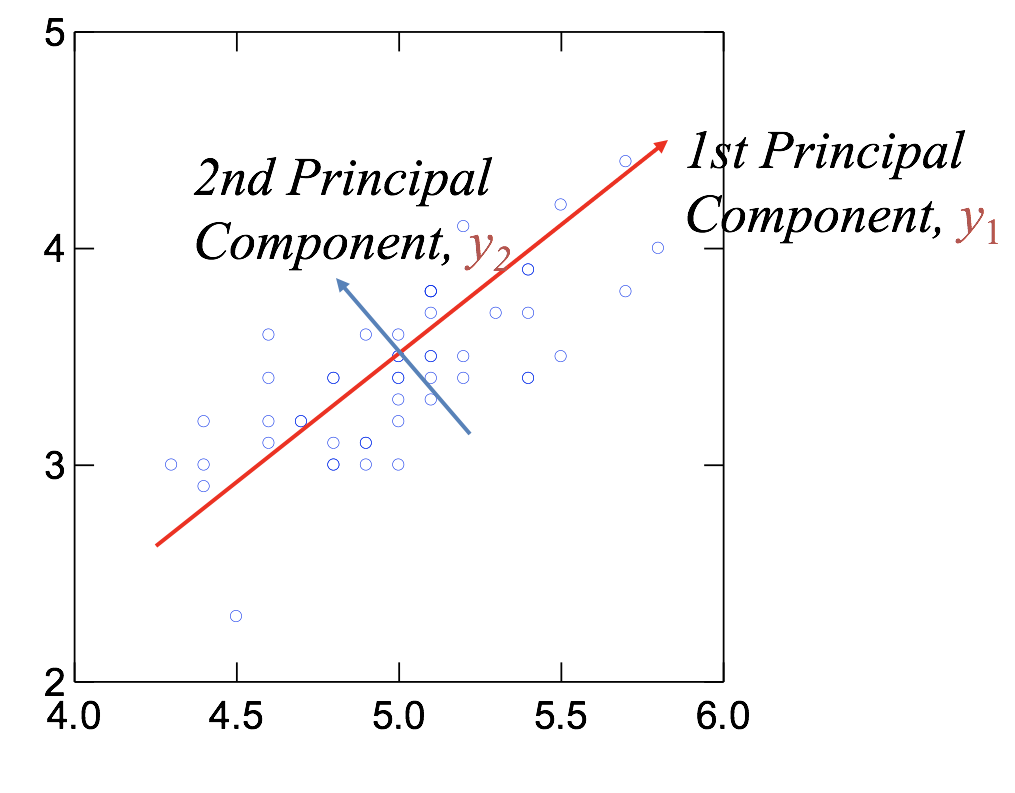

In [2]:
from IPython.display import Image
Image(filename ='/Users/martin/Documents/MyLecturesSBU/Spring2018/CSE391/figures/PCA2.png',width=700,height=700)

# PCA Scores

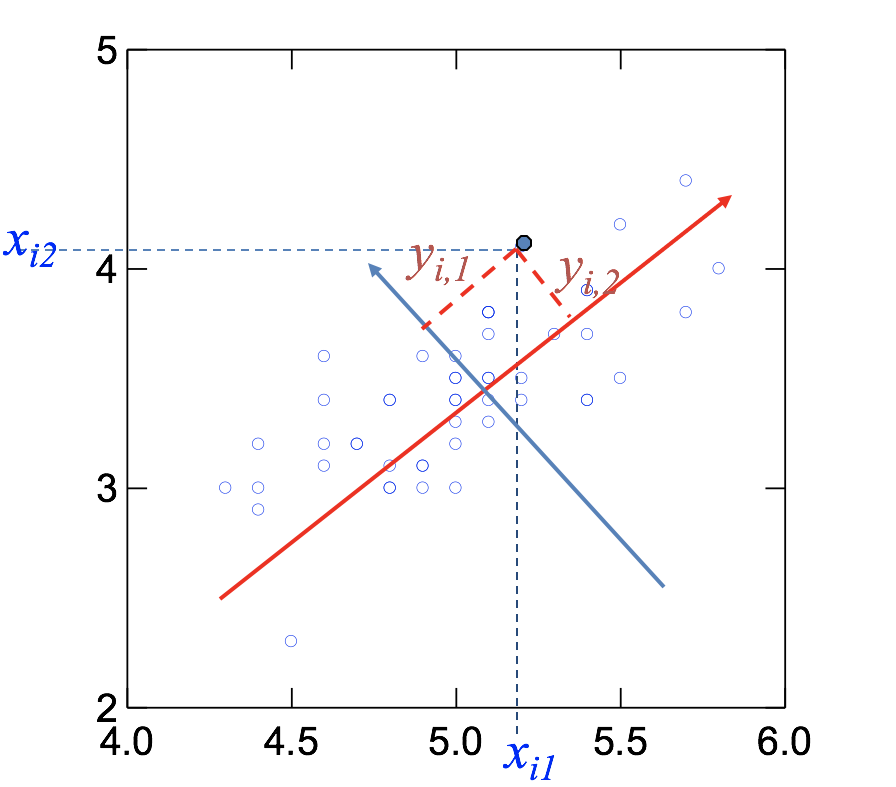

In [3]:
Image(filename ='/Users/martin/Documents/MyLecturesSBU/Spring2018/CSE391/figures/PCA3.png',width=700,height=700)

# How to perform PCA on data
- you are given a matrix
- first question you need to ask is to whether we need  to reduce the dimension of rows or column
- so we ask this question what column and row represent


## A practical step by step approach
Let the data matrix $X$ be of $n\times p$ size, where $n$ is the number of samples and $p$ is the number of variables. Let us assume that it is centered, i.e. column means have been subtracted and are now equal to zero.

Then the $p\times p$ covariance matrix $C$ is given by 

$\huge C=\frac{X^⊤X}{(n−1)}$. 

It is a symmetric matrix and so it can be diagonalized:

$\huge C=VLV^⊤$,

where $V$ is a matrix of eigenvectors (each column is an eigenvector) and $L$ is a diagonal matrix with eigenvalues $λ_i$ in the decreasing order on the diagonal. 

- The eigenvectors are called principal axes or principal directions of the data. 

- Projections of the data on the principal axes are called principal components, also known as PC scores; these can be seen as new, transformed, variables.

- The $j-th$ principal component is given by $j-th$ column of $XV$. 

- The coordinates of the $i-th$ data point in the new PC space are given by the $i-th$ row of $XV$. [SRC](https://stats.stackexchange.com/users/28666/amoeba)

# How to reduce the dimension of data

To reduce the dimensionality of the data from $p$ to $k<p$, select $k$ first columns of $XV$. Thus the new dimension of the data points is $k$ 

#  How to reconstruct the original matrix as close as possible

Multiplying the first $k$ PCs by the corresponding principal axes $V^⊤_k$ yields $X_k=(XV)_kV^T_k$ matrix that has the original $n×p$ size but is of lower rank (of rank k). This matrix Xk provides a reconstruction of the original data from the first k PCs. It has the lowest possible reconstruction error.

# Some problamaric data for PCA


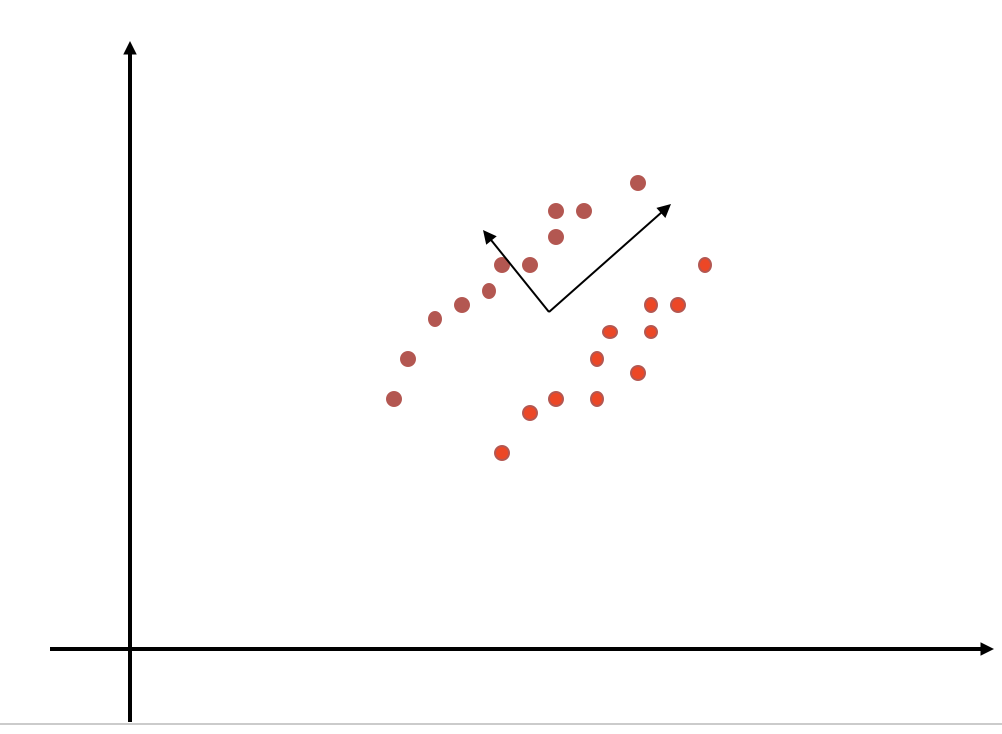

In [4]:
Image(filename ='/Users/martin/Documents/MyLecturesSBU/Spring2018/CSE391/figures/PCA4.png',width=700,height=700)

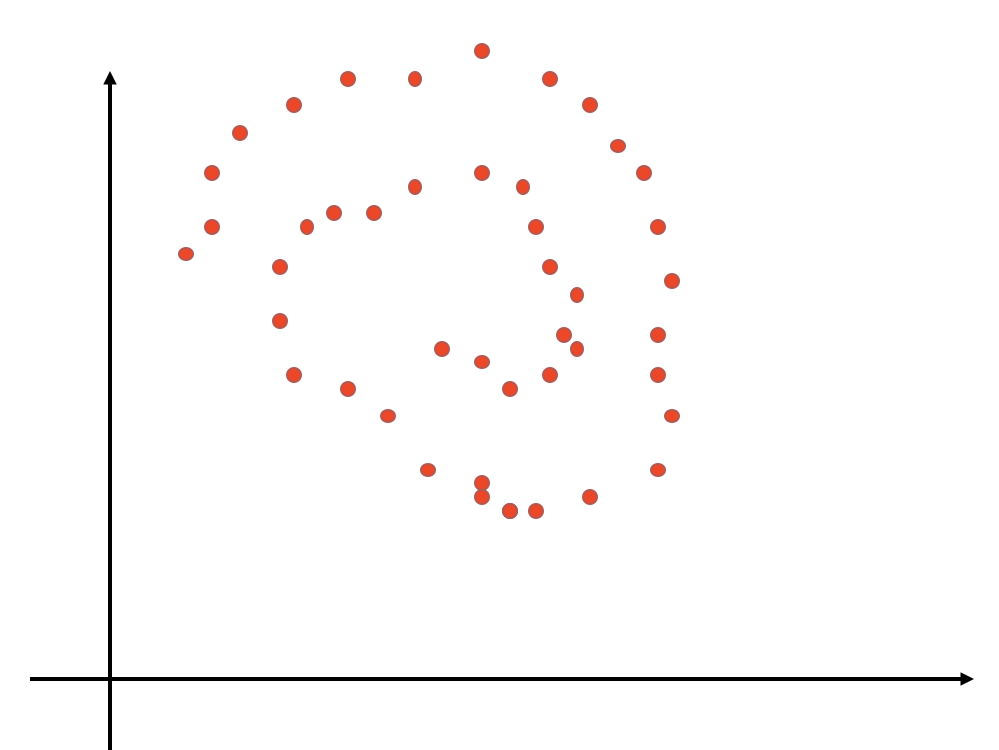

In [6]:
Image(filename ='/Users/martin/Documents/MyLecturesSBU/Spring2018/CSE391/figures/PCA5.png',width=700,height=700)

#  Understanding eigen vectors and values
First let us think what a square matrix does to a vector. Consider a matrix $A\in ℝ_{n×n}$. Let us see what the matrix A acting on a vector x does to this vector. By action, we mean multiplication i.e. we get a new vector 

$y=Ax.$

The matrix acting on a vector x does two things to the vector x.

- It scales the vector.
- It rotates the vector.

However, for any matrix A, there are some favored vectors/directions. When the matrix acts on these favored vectors, the action essentially results in just scaling the vector. There is no rotation. These favored vectors are precisely the eigenvectors and the amount by which each of these favored vectors stretches or compresses is the eigenvalue.

So why are these eigenvectors and eigenvalues important? Consider the eigenvector corresponding to the maximum (absolute) eigenvalue. If we take a vector along this eigenvector, then the action of the matrix is maximum. No other vector when acted by this matrix will get stretched as much as this eigenvector.

Hence, if a vector were to lie "close" to this eigen direction, then the "effect" of action by this matrix will be "large" i.e. the action by this matrix results in "large" response for this vector. The effect of the action by this matrix is high for large (absolute) eigenvalues and less for small (absolute) eigenvalues. Hence, the directions/vectors along which this action is high are called the principal directions or principal eigenvectors. The corresponding eigenvalues are called the principal values. [SRC](https://math.stackexchange.com/users/9246/euyu)



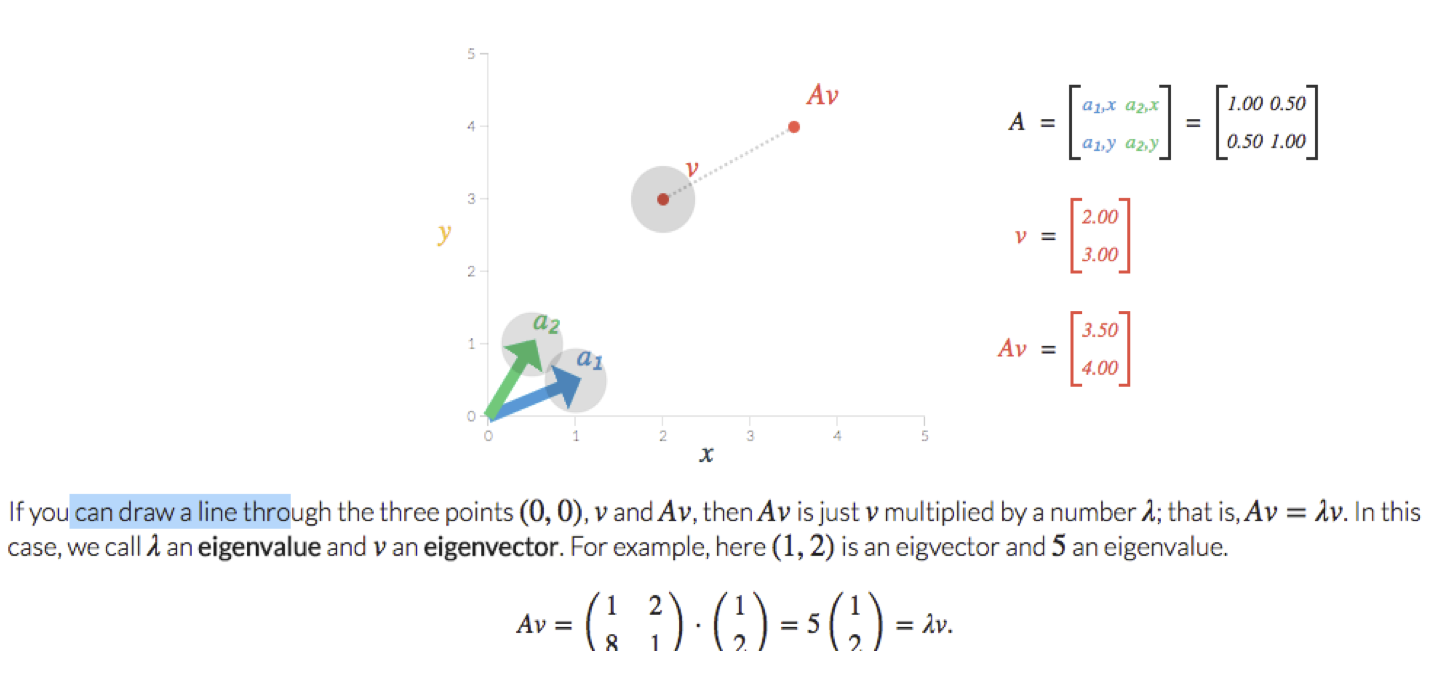

In [12]:
Image(filename ='/Users/martin/Documents/MyLecturesSBU/Spring2018/CSE391/figures/PCA6.png',width=1000,height=1000)

# PCA is usually done using Singular Values Decomposition(SVD)

What is SVD ? SVD is a factorization of a real or complex matrix. 

Consider $X_{n\times p}$ we used for PCA.
If we now perform singular value decomposition of X, we obtain a decomposition

$\huge X=U  SV^T$,

where $S$ is the diagonal matrix of singular values $si$.

 From here one can easily see that
 
$\huge C=\frac{VSU^⊤USV^⊤}{(n−1)}=V\frac{S^2}{n−1}V^⊤$,

meaning that right singular vectors $V$ are principal directions and that singular values are related to the eigenvalues of covariance matrix via

$\huge λ_i=\frac{s^2_i}{(n−1)}$. 

As such Principal components are given by 

$\huge XV=USV^⊤V=US$.



# PCA in sci-kit learn

class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)[source]

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]


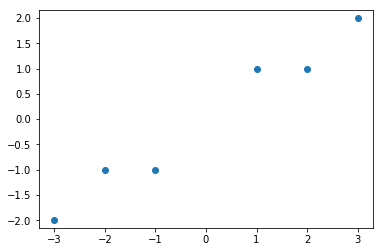

In [80]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
print(X)
pca = PCA(n_components=2)
pca.fit(X)

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
plt.show()
  

# Attributes:

- components_: Principal axes in feature space, representing the directions of maximum variance in the data. 

In [22]:
print(pca.components_) 

[[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]


- explained-variance- :The amount of variance explained by each of the selected components.

In [21]:
print(pca.explained_variance_)

[ 7.93954312  0.06045688]


- explained_variance_ratio_ : Percentage of variance explained by each of the selected components.



In [24]:
print(pca.explained_variance_ratio_)

[ 0.99244289  0.00755711]


- The singular values corresponding to each of the selected components.

In [25]:
print(pca.singular_values_)

[ 6.30061232  0.54980396]


- Per-feature empirical mean, estimated from the training set.

In [27]:
print(pca.mean_)

[ 0.  0.]


- n-components

In [28]:
print(pca.n_components_)

2


noise-variance- :The estimated noise covariance following the Probabilistic PCA model 

In [30]:
print(pca.noise_variance_)

0.0


# PCA for visualization: Hand-written digits

[SRC](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

- To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [36]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


- We can now plot the first two principal components of each point to learn about the data:

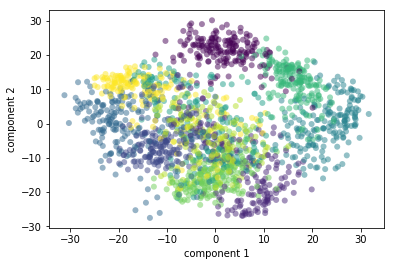

In [50]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show();

/Users/martin/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


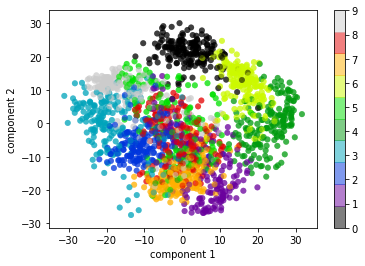

In [53]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show();

# Choosing the number of components in PCA
- A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:
[SRC](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

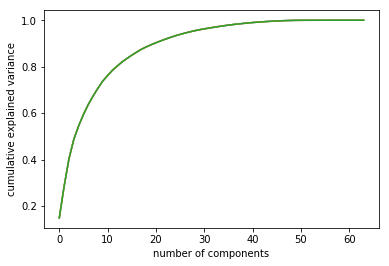

In [56]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

# Example: Eigenfaces

In [57]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [72]:
pca = PCA(150,svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

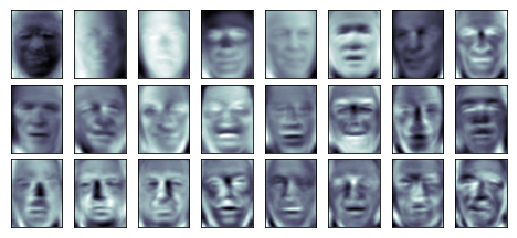

In [76]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
plt.show()
   

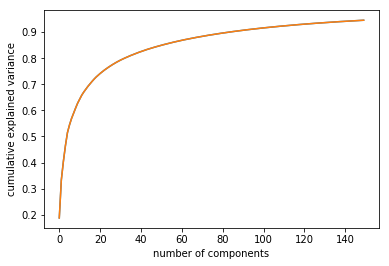

In [79]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [69]:
# Compute the components and projected faces
pca = PCA(150,svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

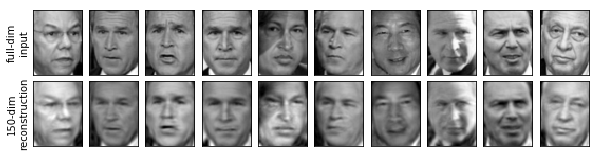

In [77]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

plt.show()